# Working with salary data (artificially generated) 

In [2]:
import numpy as np
import pandas as pd

In [4]:
# Shuffle and split data into train and test data
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

## First File "Salary_Data.csv"

### Splitting into train and test

In [114]:
salary_csv_total = pd.read_csv("./Salary_Data.csv")
salary_csv, salary_csv_test = split_train_test(salary_csv_total, 0.2)
print(len(salary_csv), "train +", len(salary_csv_test), "test")

24 train + 6 test


### Studying the training data

In [8]:
salary_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 8 to 20
Data columns (total 2 columns):
YearsExperience    24 non-null float64
Salary             24 non-null float64
dtypes: float64(2)
memory usage: 576.0 bytes


In [9]:
salary_csv.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,4.704167,70813.666667
std,2.541564,24634.945795
min,1.100000,37731.000000
25%,2.975000,56092.750000
50%,4.050000,63831.500000
75%,6.200000,92288.500000
max,9.600000,116969.000000


In [13]:
salary_csv.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.975753
Salary,0.975753,1.000000


/home/leleco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa62d7ae390>,
      dtype=object)

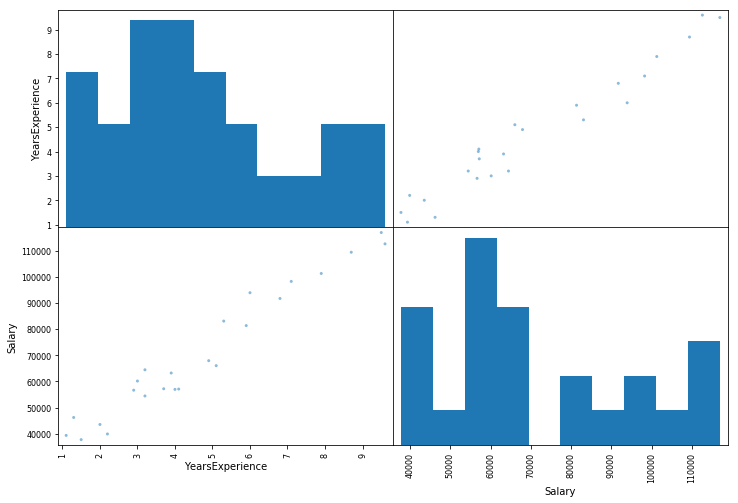

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(salary_csv, figsize=(12, 8))

### Creating a linear model to fit the data

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
salary_prep = np.array(salary_csv['YearsExperience']).reshape(-1,1)
lr.fit(salary_prep, salary_csv['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Calculating the error on train data

#### Mean squared error on the whole train data

In [39]:
from sklearn.metrics import mean_squared_error
salary_predictions = lr.predict(salary_prep)
np.sqrt(mean_squared_error(salary_predictions, salary_csv['Salary']))

5278.412615286025

#### Cross-validation on train data

In [46]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr, salary_prep , salary_csv['Salary'] ,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[4545.74476163 5651.92861918 6403.09617291 5847.42809213]


### Resulting model

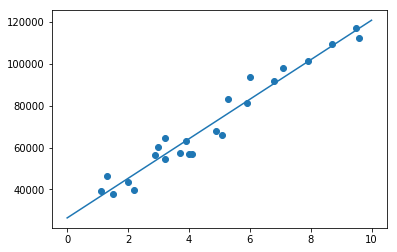

In [47]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(salary_csv['YearsExperience']).reshape(-1,1)
Y = salary_csv['Salary']

plt.scatter(X,Y)

X_plot = np.linspace(0,10,100)
plt.plot(X_plot, X_plot*lr.coef_ + lr.intercept_)

plt.show()

### Calculating the error on test data

#### Mean squared error

In [129]:
from sklearn.metrics import mean_squared_error
salary_prep_test = np.array(salary_csv_test["YearsExperience"]).reshape(-1,1)
salary_predictions_test = lr.predict(salary_prep_test)
np.sqrt(mean_squared_error(salary_predictions_test, salary_csv_test['Salary']))

6344.570420655237

#### Cross-validation

In [131]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr, salary_prep_test , salary_csv_test['Salary'] ,scoring="neg_mean_squared_error", cv=2)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[11726.32688978 11036.40422269]


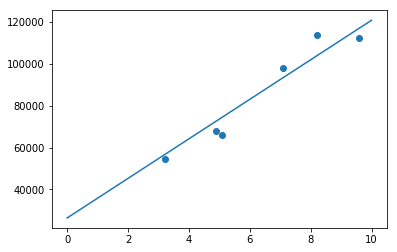

In [132]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(salary_csv_test['YearsExperience']).reshape(-1,1)
Y = salary_csv_test['Salary']

plt.scatter(X,Y)

X_plot = np.linspace(0,10,100)
plt.plot(X_plot, X_plot*lr.coef_ + lr.intercept_)

plt.show()

## Working with Salary_Data2.csv

### Separating test and train

In [138]:
salary2 = pd.read_csv("./Salary_Data2.csv")
salary_csv2, salary_csv_test2 = split_train_test(salary2, 0.2)
print(len(salary_csv2), "train +", len(salary_csv_test2), "test")

26 train + 6 test


### Analysing the data

In [139]:
salary_csv2.describe()

,YearsExperience,Salary
count,26.000000,26.000000
mean,5.019231,83858.307692
std,2.871239,30257.109074
min,1.100000,39343.000000
25%,2.925000,66773.000000
50%,4.300000,79778.000000
75%,6.825000,84795.750000
max,10.500000,152391.000000


/home/leleco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa624046358>,
      dtype=object)

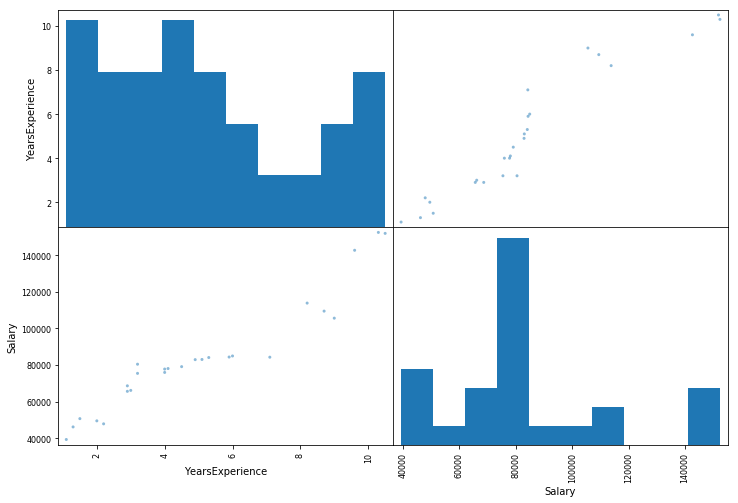

In [140]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(salary_csv2, figsize=(12, 8))

In [141]:
salary2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.939197
Salary,0.939197,1.000000


### Fitting a linear model

In [142]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
salary_prep2 = np.array(salary_csv2['YearsExperience']).reshape(-1,1)
lr2.fit(salary_prep2, salary_csv2['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Calculating error on train data

#### Root mean squared error

In [143]:
from sklearn.metrics import mean_squared_error
salary_predictions2 = lr2.predict(salary_prep2)
np.sqrt(mean_squared_error(salary_predictions2, salary_csv2['Salary']))

9042.610998980183

#### Cross-validation

In [144]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr, salary_prep2 , salary_csv2['Salary'] ,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[ 9742.09842737 11745.24787156  5977.77476931  7981.72923505]


### Plotting linear model

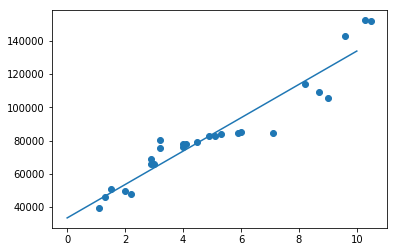

In [145]:
import numpy as np
import matplotlib.pyplot as plt

X = salary_prep2
Y = salary_csv2['Salary']

plt.scatter(X,Y)

X_plot = np.linspace(0,10,100)
plt.plot(X_plot, X_plot*lr2.coef_ + lr2.intercept_)

plt.show()

### Using YearsExperience^2 and YearsExperience^3 in the model

In [146]:
ye_squared = salary_csv2["YearsExperience"]**2 
ye_cubed = salary_csv2["YearsExperience"]**3

salary_prep2_with_xs = np.concatenate([salary_prep2, np.array(ye_squared).reshape(-1,1), np.array(ye_cubed).reshape(-1,1)], axis=1)

### Creating the linear model with the new variables

In [147]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(salary_prep2_with_xs, salary_csv2['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Calculating error for train data

#### Root mean squared error

In [148]:
from sklearn.metrics import mean_squared_error
salary_predictions3 = lr3.predict(salary_prep2_with_xs)
np.sqrt(mean_squared_error(salary_predictions3, salary_csv2['Salary']))

5599.525134459616

#### Cross-validation

In [149]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr3, salary_prep2_with_xs , salary_csv2['Salary'] ,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[ 7642.98458729  6352.67835108  6986.0798286  10401.7423224 ]


### Plotting the new model

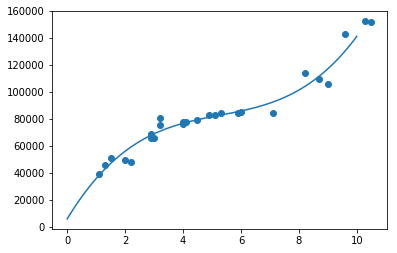

In [151]:
import numpy as np
import matplotlib.pyplot as plt

X = salary_prep2
Y = salary_csv2['Salary']

plt.scatter(X,Y)

X_plot = np.linspace(0,10,100)
plt.plot(X_plot, X_plot*lr3.coef_[0] + X_plot*X_plot*lr3.coef_[1] + X_plot*X_plot*X_plot*lr3.coef_[2] + lr3.intercept_)

plt.show()

### Calculating error for test data

#### Root mean squared error

In [161]:
from sklearn.metrics import mean_squared_error

salary_prep_test2 = np.array(salary_csv_test2["YearsExperience"]).reshape(-1,1)
ye_squared_test = salary_prep_test2**2 
ye_cubed_test = salary_prep_test2**3
salary_prep2_with_xs_test = np.concatenate([salary_prep_test2, ye_squared_test, ye_cubed_test], axis=1)
salary_predictions3_test = lr3.predict(salary_prep2_with_xs_test)
np.sqrt(mean_squared_error(salary_predictions3_test, salary_csv_test2['Salary']))

5632.445360547833

#### Cross-validation

In [162]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr3, salary_prep2_with_xs_test , salary_csv_test2['Salary'] ,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[ 8311.73678486 17926.00615973  7512.58112327 35558.99341561]


### Plotting the new model

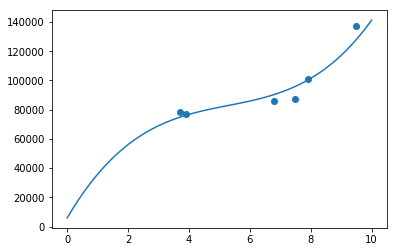

In [165]:
import numpy as np
import matplotlib.pyplot as plt

X = salary_prep_test2
Y = salary_csv_test2['Salary']

plt.scatter(X,Y)

X_plot = np.linspace(0,10,100)
plt.plot(X_plot, X_plot*lr3.coef_[0] + X_plot*X_plot*lr3.coef_[1] + X_plot*X_plot*X_plot*lr3.coef_[2] + lr3.intercept_)

plt.show()